<a href="https://colab.research.google.com/github/lp-0406/Employee-Salary-Prediction/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [58]:
data=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/adult 3.csv")

In [59]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [60]:
print(f"Dataset shape: {data.shape}")
print(f"\nColumns: {list(data.columns)}")
print(f"\nData types:\n{data.dtypes}")
print(f"\nMissing values:\n{data.isnull().sum()}")
print(f"\nTarget variable distribution:\n{data['income'].value_counts()}")


Dataset shape: (48842, 15)

Columns: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Data types:
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

Missing values:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: 

In [61]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [62]:
print("Checking for '?' values in categorical columns:")
categorical_cols = ['workclass', 'occupation', 'native-country']
for col in categorical_cols:
    if col in data.columns:
        print(f"{col}: {(data[col] == '?').sum()} missing values")

Checking for '?' values in categorical columns:
workclass: 2799 missing values
occupation: 2809 missing values
native-country: 857 missing values


In [63]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [64]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-64-4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [65]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-65-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [66]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [67]:
print(f"After cleaning, dataset shape: {data.shape}")

After cleaning, dataset shape: (48811, 15)


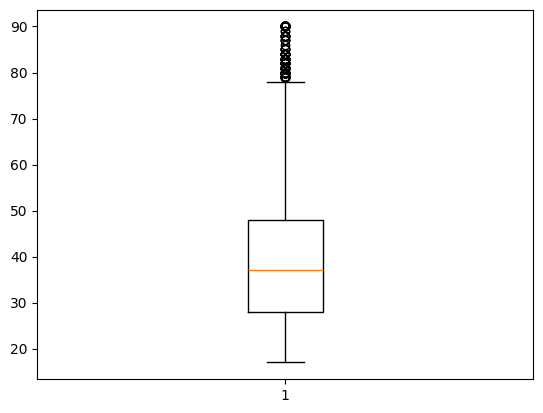

In [69]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [70]:
data=data[(data['age']<=75)&(data['age']>=17)]

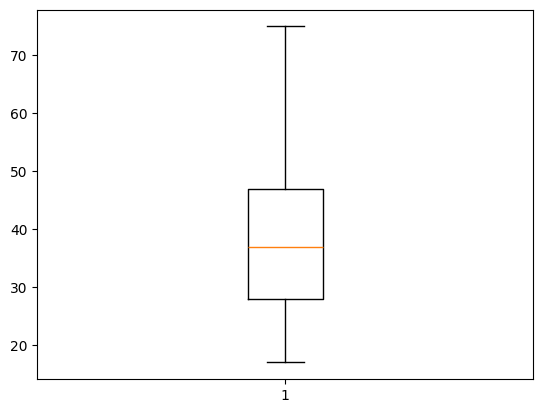

In [71]:
plt.boxplot(data['age'])
plt.show()

In [72]:
data.shape

(48438, 15)

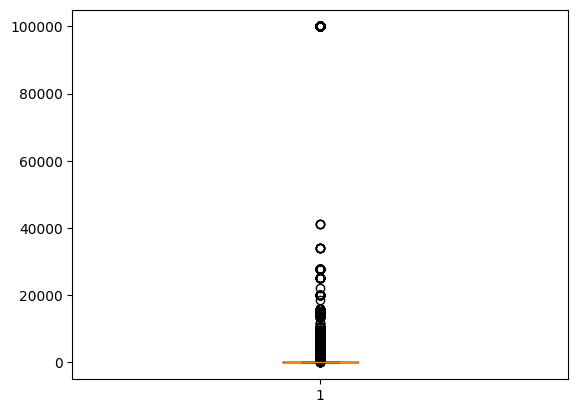

In [73]:
plt.boxplot(data['capital-gain'])
plt.show()

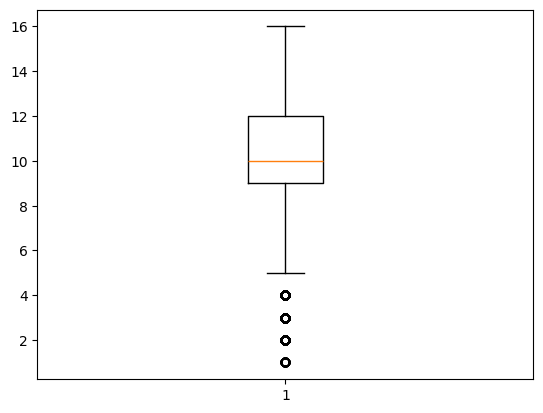

In [74]:
plt.boxplot(data['educational-num'])
plt.show()

In [75]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

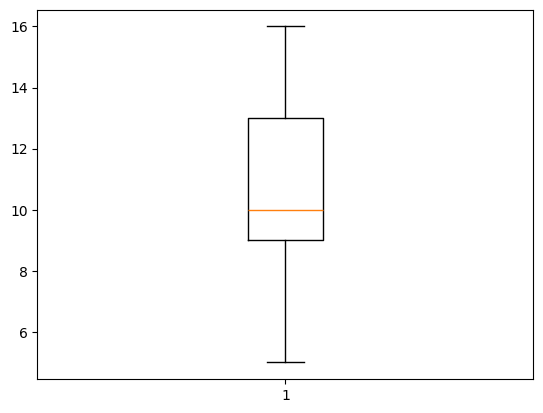

In [76]:
plt.boxplot(data['educational-num'])
plt.show()

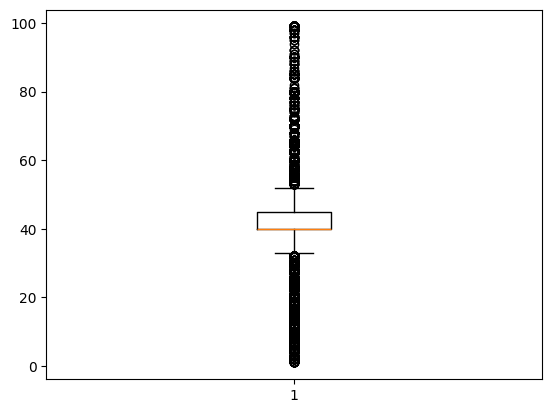

In [77]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [78]:
data.shape

(46720, 15)

In [79]:
columns_to_keep = [
    'age', 'workclass', 'educational-num', 'marital-status',
    'occupation', 'relationship', 'race', 'gender',
    'capital-gain', 'capital-loss', 'hours-per-week', 'income'
]

data = data[columns_to_keep]

print(f"Selected columns: {list(data.columns)}")
print(f"Final dataset shape: {data.shape}")


Selected columns: ['age', 'workclass', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
Final dataset shape: (46720, 12)


In [80]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,18,Others,10,Never-married,Others,Own-child,White,Female,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [81]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [82]:
encoder_dict = {}
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoder_dict[col] = le
    print(f"Encoded {col}: {len(le.classes_)} categories")

Encoded workclass: 7 categories
Encoded marital-status: 7 categories
Encoded occupation: 15 categories
Encoded relationship: 6 categories
Encoded race: 5 categories
Encoded gender: 2 categories


In [83]:
joblib.dump(encoder_dict, "label_encoders.pkl")
print("Label encoders saved successfully!")

Label encoders saved successfully!


In [84]:
data.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,3,7,4,6,3,2,1,0,0,40,<=50K
1,38,3,9,2,4,0,4,1,0,0,50,<=50K
2,28,1,12,2,11,0,4,1,0,0,40,>50K
3,44,3,10,2,6,0,2,1,7688,0,40,>50K
4,18,2,10,4,8,3,4,0,0,0,30,<=50K


In [85]:
X = data.drop('income', axis=1)
y = data['income']

In [86]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")
print(f"Target classes: {y.unique()}")

Features shape: (46720, 11)
Target shape: (46720,)
Feature columns: ['age', 'workclass', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']
Target classes: ['<=50K' '>50K']


In [87]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 37376
Test set size: 9344


In [89]:
models = {
    "LogisticRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    "RandomForest": Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC(probability=True, random_state=42))
    ]),
    "GradientBoosting": Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
}

results = {}
trained_models = {}

for name, pipeline in models.items():
    print(f"\nTraining {name}...")

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    trained_models[name] = pipeline

    print(f"{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Training LogisticRegression...
LogisticRegression Accuracy: 0.8259
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7038
        >50K       0.73      0.47      0.57      2306

    accuracy                           0.83      9344
   macro avg       0.79      0.71      0.73      9344
weighted avg       0.82      0.83      0.81      9344


Training RandomForest...
RandomForest Accuracy: 0.8522
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      7038
        >50K       0.73      0.64      0.68      2306

    accuracy                           0.85      9344
   macro avg       0.81      0.78      0.79      9344
weighted avg       0.85      0.85      0.85      9344


Training KNN...
KNN Accuracy: 0.8355
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7038
      

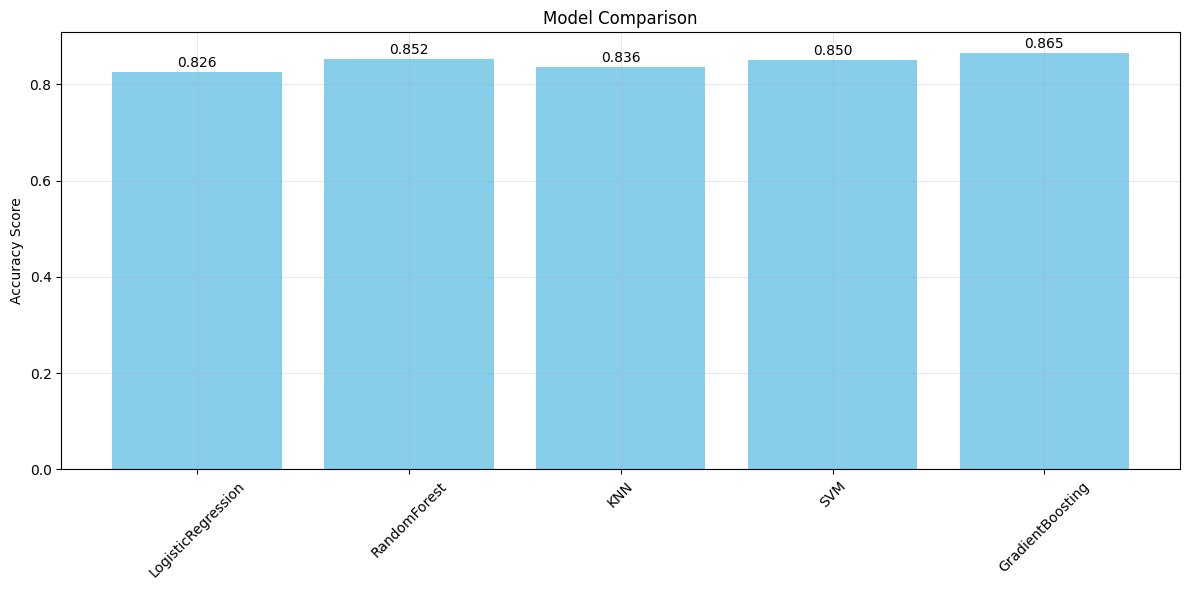

In [90]:
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center')
plt.tight_layout()
plt.show()

In [91]:
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]
best_accuracy = results[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")


Best Model: GradientBoosting
Best Accuracy: 0.8647


In [92]:
feature_names = X.columns.tolist()
model_data = (best_model, feature_names)

joblib.dump(model_data, "best_model.pkl")
print(f"Model saved successfully as 'best_model.pkl'")
print(f"Model type: {type(best_model)}")
print(f"Feature columns: {feature_names}")
try:
    loaded_model, loaded_features = joblib.load("best_model.pkl")
    print("Model verification successful!")
    print(f"Loaded feature count: {len(loaded_features)}")
except Exception as e:
    print(f"Error verifying model: {e}")

Model saved successfully as 'best_model.pkl'
Model type: <class 'sklearn.pipeline.Pipeline'>
Feature columns: ['age', 'workclass', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week']
Model verification successful!
Loaded feature count: 11


In [93]:
def make_sample_prediction():
    model, features = joblib.load("best_model.pkl")

    sample_data = pd.DataFrame({
        'age': [35],
        'workclass': [3],
        'educational-num': [13],
        'marital-status': [2],
        'occupation': [6],
        'relationship': [0],
        'race': [4],
        'gender': [1],
        'capital-gain': [0],
        'capital-loss': [0],
        'hours-per-week': [45]
    })

    sample_data = sample_data[features]

    prediction = model.predict(sample_data)
    try:
        probability = model.predict_proba(sample_data)
        print(f"Sample Prediction: {prediction[0]}")
        print(f"Prediction Probabilities: {probability[0]}")
    except:
        print(f"Sample Prediction: {prediction[0]}")

    return True

make_sample_prediction()

Sample Prediction: >50K
Prediction Probabilities: [0.43132704 0.56867296]


True

In [98]:
from google.colab import files

files.download('best_model.pkl')
files.download('label_encoders.pkl')

with open('app.py', 'w') as f:
    f.write('''import streamlit as st
import pandas as pd
import joblib
import numpy as np
from pathlib import Path

# App configuration
st.set_page_config(
    page_title="💼 Employee Salary Classifier",
    layout="wide",
    initial_sidebar_state="collapsed"
)

# Enhanced Custom CSS
st.markdown("""
    <style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

    .stApp {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        font-family: 'Poppins', sans-serif;
    }

    .main-header {
        background: rgba(255, 255, 255, 0.1);
        backdrop-filter: blur(10px);
        border-radius: 20px;
        padding: 2rem;
        margin-bottom: 2rem;
        border: 1px solid rgba(255, 255, 255, 0.2);
        text-align: center;
    }

    .main-header h1 {
        color: white;
        font-size: 3rem;
        font-weight: 700;
        margin-bottom: 0.5rem;
        text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
    }

    .main-header p {
        color: rgba(255, 255, 255, 0.9);
        font-size: 1.2rem;
        font-weight: 300;
        margin: 0;
    }

    .input-container {
        background: rgba(255, 255, 255, 0.95);
        backdrop-filter: blur(10px);
        border-radius: 20px;
        padding: 2rem;
        margin-bottom: 2rem;
        box-shadow: 0 8px 32px rgba(0, 0, 0, 0.1);
        border: 1px solid rgba(255, 255, 255, 0.2);
    }

    .input-container h3 {
        color: #4a5568;
        font-weight: 600;
        margin-bottom: 1.5rem;
        text-align: center;
        font-size: 1.5rem;
    }

    .stSelectbox > div > div > div {
        background-color: #f7fafc;
        border-radius: 12px;
        border: 2px solid #e2e8f0;
        transition: all 0.3s ease;
    }

    .stSelectbox > div > div > div:focus-within {
        border-color: #667eea;
        box-shadow: 0 0 0 3px rgba(102, 126, 234, 0.1);
    }

    .stSlider > div > div > div > div {
        background-color: #667eea;
    }

    .stSlider > div > div > div > div > div {
        background-color: #4c51bf;
    }

    .stButton > button {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        border: none;
        border-radius: 12px;
        padding: 0.75rem 2rem;
        font-size: 1.1rem;
        font-weight: 600;
        transition: all 0.3s ease;
        box-shadow: 0 4px 15px rgba(102, 126, 234, 0.4);
        width: 100%;
        height: 3.5rem;
    }

    .stButton > button:hover {
        transform: translateY(-2px);
        box-shadow: 0 6px 20px rgba(102, 126, 234, 0.6);
    }

    .prediction-result {
        background: linear-gradient(135deg, #48bb78 0%, #38a169 100%);
        color: white;
        padding: 1.5rem;
        border-radius: 15px;
        text-align: center;
        font-size: 1.3rem;
        font-weight: 600;
        margin: 1rem 0;
        box-shadow: 0 4px 15px rgba(72, 187, 120, 0.4);
    }

    .error-message {
        background: linear-gradient(135deg, #f56565 0%, #e53e3e 100%);
        color: white;
        padding: 1rem;
        border-radius: 10px;
        margin: 1rem 0;
    }

    .info-card {
        background: rgba(255, 255, 255, 0.9);
        padding: 1.5rem;
        border-radius: 15px;
        margin: 1rem 0;
        box-shadow: 0 4px 15px rgba(0, 0, 0, 0.1);
    }

    .batch-section {
        background: rgba(255, 255, 255, 0.95);
        backdrop-filter: blur(10px);
        border-radius: 20px;
        padding: 2rem;
        margin-top: 2rem;
        box-shadow: 0 8px 32px rgba(0, 0, 0, 0.1);
        border: 1px solid rgba(255, 255, 255, 0.2);
    }

    .metric-card {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        color: white;
        padding: 1rem;
        border-radius: 10px;
        text-align: center;
        margin: 0.5rem;
    }

    /* Hide Streamlit branding */
    #MainMenu {visibility: hidden;}
    footer {visibility: hidden;}
    .stDeployButton {display:none;}
    </style>
""", unsafe_allow_html=True)

def load_model_safely():
    """Load the model with error handling"""
    try:
        model_path = Path("best_model.pkl")
        if model_path.exists():
            model, expected_columns = joblib.load(model_path)
            return model, expected_columns, None
        else:
            return None, None, "Model file 'best_model.pkl' not found. Please ensure the model file is in the same directory as this app."
    except Exception as e:
        return None, None, f"Error loading model: {str(e)}"

def load_encoders():
    """Load the saved label encoders"""
    try:
        encoders = joblib.load("label_encoders.pkl")
        return encoders, None
    except Exception as e:
        return None, f"Error loading encoders: {str(e)}"

def validate_input(input_df, expected_columns):
    """Validate input data"""
    try:
        # Check if all expected columns are present
        missing_cols = set(expected_columns) - set(input_df.columns)
        if missing_cols:
            return False, f"Missing columns: {missing_cols}"

        # Reorder columns to match expected order
        input_df = input_df[expected_columns]
        return True, input_df
    except Exception as e:
        return False, f"Input validation error: {str(e)}"

# Load model and encoders
model, expected_columns, model_error = load_model_safely()
encoders, encoder_error = load_encoders()

# Main header
st.markdown("""
    <div class="main-header">
        <h1>💼 Employee Salary Classifier</h1>
        <p>Advanced ML-powered salary prediction system</p>
    </div>
""", unsafe_allow_html=True)

if model_error or encoder_error:
    st.markdown(f"""
        <div class="error-message">
            <h3>⚠️ Setup Error</h3>
            <p>{model_error or encoder_error}</p>
        </div>
    """, unsafe_allow_html=True)
    st.stop()

# Display model information
st.markdown('<div class="info-card">', unsafe_allow_html=True)
st.markdown("### 📊 Model Information")
col_info1, col_info2 = st.columns(2)
with col_info1:
    st.info(f"**Model Type**: {type(model).__name__}")
    st.info(f"**Features Used**: {len(expected_columns)}")
with col_info2:
    st.info(f"**Expected Columns**: {', '.join(expected_columns)}")
st.markdown('</div>', unsafe_allow_html=True)

# Input section
st.markdown('<div class="input-container">', unsafe_allow_html=True)
st.markdown('<h3>👤 Enter Employee Information</h3>', unsafe_allow_html=True)

# Create input form with exact column matching
col1, col2, col3 = st.columns([1, 1, 1])

with col1:
    st.markdown("### 📊 Demographics")
    age = st.slider("📅 Age", 17, 75, 35, help="Employee's age in years")

    educational_num = st.selectbox("🎓 Education Level",
        options=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
        index=8,  # Default to 13 (Bachelor's)
        help="Education level: 5=Elementary, 9=HS-grad, 13=Bachelors, 14=Masters, 16=PhD")

with col2:
    st.markdown("### 💼 Work Details")

    # Work class selection
    if encoders and 'workclass' in encoders:
        workclass_options = list(encoders['workclass'].classes_)
        workclass_str = st.selectbox("🏢 Work Class", workclass_options,
                                   help="Type of employer")
        workclass = encoders['workclass'].transform([workclass_str])[0]
    else:
        st.error("Workclass encoder not found")
        st.stop()

    # Occupation selection
    if encoders and 'occupation' in encoders:
        occupation_options = list(encoders['occupation'].classes_)
        occupation_str = st.selectbox("💼 Occupation", occupation_options,
                                    help="Job role/occupation")
        occupation = encoders['occupation'].transform([occupation_str])[0]
    else:
        st.error("Occupation encoder not found")
        st.stop()

with col3:
    st.markdown("### 👥 Personal Details")

    # Marital status selection
    if encoders and 'marital-status' in encoders:
        marital_options = list(encoders['marital-status'].classes_)
        marital_str = st.selectbox("💑 Marital Status", marital_options,
                                 help="Current marital status")
        marital_status = encoders['marital-status'].transform([marital_str])[0]
    else:
        st.error("Marital status encoder not found")
        st.stop()

    # Relationship selection
    if encoders and 'relationship' in encoders:
        relationship_options = list(encoders['relationship'].classes_)
        relationship_str = st.selectbox("👨‍👩‍👧‍👦 Relationship", relationship_options,
                                      help="Relationship within household")
        relationship = encoders['relationship'].transform([relationship_str])[0]
    else:
        st.error("Relationship encoder not found")
        st.stop()

# Additional inputs row
col4, col5 = st.columns([1, 1])

with col4:
    # Race selection
    if encoders and 'race' in encoders:
        race_options = list(encoders['race'].classes_)
        race_str = st.selectbox("🌍 Race", race_options, help="Race/ethnicity")
        race = encoders['race'].transform([race_str])[0]
    else:
        st.error("Race encoder not found")
        st.stop()

    # Gender selection
    if encoders and 'gender' in encoders:
        gender_options = list(encoders['gender'].classes_)
        gender_str = st.selectbox("⚧ Gender", gender_options, help="Gender")
        gender = encoders['gender'].transform([gender_str])[0]
    else:
        st.error("Gender encoder not found")
        st.stop()

with col5:
    hours_per_week = st.slider("🕒 Hours per Week", 1, 80, 40,
                              help="Average hours worked per week")
    capital_gain = st.number_input("💰 Capital Gain", 0, 100000, 0,
                                  help="Capital gains from investments")
    capital_loss = st.number_input("💸 Capital Loss", 0, 10000, 0,
                                  help="Capital losses from investments")

st.markdown('</div>', unsafe_allow_html=True)

# Create input dataframe with EXACT feature order from training
input_data = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'educational-num': [educational_num],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week]
})

# Ensure columns are in the correct order (this is CRITICAL)
try:
    input_data = input_data[expected_columns]
except KeyError as e:
    st.error(f"Column mismatch error: {e}")
    st.write("Expected columns:", expected_columns)
    st.write("Available columns:", list(input_data.columns))
    st.stop()

# Display input preview with user-friendly names
st.markdown('<div class="info-card">', unsafe_allow_html=True)
st.markdown("### 📋 Input Data Preview")
display_df = pd.DataFrame({
    'Age': [age],
    'Work Class': [workclass_str],
    'Education Level': [educational_num],
    'Marital Status': [marital_str],
    'Occupation': [occupation_str],
    'Relationship': [relationship_str],
    'Race': [race_str],
    'Gender': [gender_str],
    'Capital Gain': [capital_gain],
    'Capital Loss': [capital_loss],
    'Hours/Week': [hours_per_week]
})
st.dataframe(display_df, use_container_width=True)
st.markdown('</div>', unsafe_allow_html=True)

# Prediction section
col_predict1, col_predict2, col_predict3 = st.columns([1, 2, 1])
with col_predict2:
    if st.button("🚀 Predict Salary Class", key="predict_btn"):
        try:
            # Make prediction
            prediction = model.predict(input_data)[0]

            # Try to get prediction probabilities
            try:
                prob = model.predict_proba(input_data)[0]
                confidence = max(prob) * 100

                st.markdown(f"""
                    <div class="prediction-result">
                        <h2>🎯 Prediction Result</h2>
                        <h3>Salary Class: {prediction}</h3>
                        <p>Confidence: {confidence:.1f}%</p>
                    </div>
                """, unsafe_allow_html=True)
            except:
                st.markdown(f"""
                    <div class="prediction-result">
                        <h2>🎯 Prediction Result</h2>
                        <h3>Salary Class: {prediction}</h3>
                    </div>
                """, unsafe_allow_html=True)

        except Exception as e:
            st.markdown(f"""
                <div class="error-message">
                    <h4>❌ Prediction Error</h4>
                    <p>{str(e)}</p>
                    <p><strong>Debug Info:</strong></p>
                    <p>Input shape: {input_data.shape}</p>
                    <p>Expected columns: {expected_columns}</p>
                    <p>Input columns: {list(input_data.columns)}</p>
                </div>
            """, unsafe_allow_html=True)

# Batch prediction section
st.markdown('<div class="batch-section">', unsafe_allow_html=True)
st.markdown("### 📂 Batch Prediction from CSV")
st.markdown("Upload a CSV file with employee data to get predictions for multiple employees at once.")

uploaded_file = st.file_uploader(
    "Choose CSV File",
    type=["csv"],
    help="Upload a CSV file with columns matching the input format"
)

if uploaded_file is not None:
    try:
        batch_data = pd.read_csv(uploaded_file)

        st.markdown("### 📑 Uploaded Data Preview")
        st.dataframe(batch_data.head(10), use_container_width=True)

        if st.button("🔄 Process Batch Predictions", key="batch_predict"):
            try:
                # Validate batch data
                is_valid, result = validate_input(batch_data, expected_columns)

                if not is_valid:
                    st.markdown(f"""
                        <div class="error-message">
                            <h4>❌ Batch Data Error</h4>
                            <p>{result}</p>
                            <p><strong>Expected columns:</strong> {', '.join(expected_columns)}</p>
                            <p><strong>Your CSV columns:</strong> {', '.join(batch_data.columns)}</p>
                        </div>
                    """, unsafe_allow_html=True)
                else:
                    batch_data_processed = result
                    predictions = model.predict(batch_data_processed)

                    # Add predictions to the dataframe
                    batch_results = batch_data.copy()
                    batch_results["Predicted_Salary_Class"] = predictions

                    # Try to add confidence scores
                    try:
                        probabilities = model.predict_proba(batch_data_processed)
                        confidence_scores = np.max(probabilities, axis=1) * 100
                        batch_results["Confidence_%"] = confidence_scores.round(1)
                    except:
                        pass

                    st.markdown("### ✅ Batch Prediction Results")
                    st.dataframe(batch_results, use_container_width=True)

                    # Download button
                    csv_data = batch_results.to_csv(index=False).encode("utf-8")
                    st.download_button(
                        label="📥 Download Results as CSV",
                        data=csv_data,
                        file_name="salary_predictions_results.csv",
                        mime="text/csv",
                        key="download_batch"
                    )

                    # Show summary statistics
                    st.markdown("### 📊 Prediction Summary")
                    summary_col1, summary_col2 = st.columns(2)

                    with summary_col1:
                        high_salary_count = (predictions == '>50K').sum()
                        st.markdown(f"""
                            <div class="metric-card">
                                <h4>💰 High Salary (>50K)</h4>
                                <h2>{high_salary_count}</h2>
                                <p>{(high_salary_count/len(predictions)*100):.1f}% of total</p>
                            </div>
                        """, unsafe_allow_html=True)

                    with summary_col2:
                        low_salary_count = (predictions == '<=50K').sum()
                        st.markdown(f"""
                            <div class="metric-card">
                                <h4>💼 Standard Salary (≤50K)</h4>
                                <h2>{low_salary_count}</h2>
                                <p>{(low_salary_count/len(predictions)*100):.1f}% of total</p>
                            </div>
                        """, unsafe_allow_html=True)

            except Exception as e:
                st.markdown(f"""
                    <div class="error-message">
                        <h4>❌ Batch Processing Error</h4>
                        <p>{str(e)}</p>
                    </div>
                """, unsafe_allow_html=True)

    except Exception as e:
        st.markdown(f"""
            <div class="error-message">
                <h4>❌ File Reading Error</h4>
                <p>{str(e)}</p>
                <p>Please ensure your CSV file is properly formatted.</p>
            </div>
        """, unsafe_allow_html=True)

st.markdown('</div>', unsafe_allow_html=True)

# Footer
st.markdown("""
    <div style="text-align: center; padding: 2rem; color: rgba(255, 255, 255, 0.7);">
        <p>🚀 Powered by Machine Learning | Built with Streamlit</p>
        <p style="font-size: 0.9rem;">Model trained on Adult Census Income Dataset</p>
    </div>
""", unsafe_allow_html=True)''')

files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
print("\n" + "="*50)
print("🎉 NOTEBOOK EXECUTION COMPLETED SUCCESSFULLY!")
print("="*50)
print(f"📊 Final dataset shape: {data.shape}")
print(f"🏆 Best model: {best_model_name} (Accuracy: {best_accuracy:.4f})")
print(f"📁 Files created:")
print(f"   - best_model.pkl (trained model)")
print(f"   - label_encoders.pkl (preprocessing encoders)")
print(f"   - app.py (Streamlit application)")
print("\n🚀 You can now run the Streamlit app!")
print("="*50)


🎉 NOTEBOOK EXECUTION COMPLETED SUCCESSFULLY!
📊 Final dataset shape: (46720, 12)
🏆 Best model: GradientBoosting (Accuracy: 0.8647)
📁 Files created:
   - best_model.pkl (trained model)
   - label_encoders.pkl (preprocessing encoders)
   - app.py (Streamlit application)

🚀 You can now run the Streamlit app!
